In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.axes
from matplotlib.offsetbox import AnchoredText
import csv
import pylab as pl
import numpy as np
import config_constants as cc
from collections import OrderedDict
import itertools

In [2]:
#load data
#folder = '.\Results\AutoXYTest_20230524_101410' #2.25, p3
#folder = '.\Results\AutoXYTest_20230524_112114' #2.5, p3
#folder = '.\Results\AutoXYTest_20230524_123357' #2.75, p3
#folder = '.\Results\AutoXYTest_20230524_143541' #90 deg turn, all 2v, p3
#folder = '.\Results\AutoXYTest_20230524_154842' #everything is same, p3
#folder = '.\Results\AutoXYTest_20230524_171148' #everything is same, p1
#folder = '.\Results\AutoXYTest_20230524_173737' #everything is same, p2
#folder = '.\Results\AutoXYTest_20230525_120229' #velocities clibrated, micro at 2, p2
#folder = '.\Results\AutoXYTest_20230525_132425' #velocities clibrated, micro at 2.5, p2
#folder = '.\Results\AutoXYTest_20230526_080826' #velocities clibrated, micro at 2, p2, better than 2.5 for some reason
#folder = '.\Results\AutoXYTest_20230526_105001' #velocities clibrated, micro at 2, p3
#folder = '.\Results\AutoXYTest_20230526_120212' #velocities clibrated, micro at 2, neg y at 2.5, p3
#folder = '.\Results\AutoXYTest_20230529_201111' #all micros are at 1.25
#folder = '.\Results\AutoXYTest_20230529_213042'
#folder = '.\Results\AutoXYTest_20230530_081934'
#folder = '.\Results\AutoXYTest_20230530_124320' #one of first tries using 0.25s
#folder = '.\Results\AutoXYTest_20230530_214051' #25 trial limit
#folder = '.\Results\AutoXYTest_20230531_083045'
#folder = '.\Results\AutoXYTest_20230531_134225' #decreasing time, 10 trial limit, many wins, very strange error along the bottom
#folder = '.\Results\AutoXYTest_20230601_111956'
#folder = '.\Results\AutoXYTest_20230605_093446' #tests with new move defs, good concept
#folder = '.\Results\AutoXYTest_20230605_162612' #socket change, still new move defs
#folder = '.\Results\AutoXYTest_20230607_161139' #soldered, new micro moves
#folder = '.\Results\AutoXYTest_20230607_173221'
#folder = '.\Results\AutoXYTest_20230609_172638'
#folder = '.\Results\AutoXYTest_20230611_131133'
#folder = '.\Results\AutoXYTest_20230612_151903' #mon evening
#folder = '.\Results\AutoXYTest_20230613_082638' #tue morning
#folder = '.\Results\AutoXYTest_20230614_131837'
#folder = '.\Results\AutoXYTest_20230614_154951'
#folder = '.\Results\AutoXYTest_20230614_163746'
#folder = '.\Results\AutoXYTest_20230616_110755' #calibration after multimeter
#folder = '.\Results\AutoXYTest_20230616_111851'
#folder = '.\Results\AutoXYTest_20230619_093854' #first run of Monday
#folder = '.\Results\AutoXYTest_20230619_095405' #after multimeter
#folder = '.\Results\AutoXYTest_20230619_133151' #back to 2, fresh calib
#folder = '.\Results\AutoXYTest_20230620_153336' #
#folder = '.\Results\AutoXYTest_20230620_212529' #
#folder = '.\Results\AutoXYTest_20230620_220652' #
#folder = '.\Results\AutoXYTest_20230621_084031' #200 pt random
#folder = '.\Results\AutoXYTest_20230621_110508' #124 grid
#folder = '.\Results\AutoXYTest_20230621_154311' #124 grid after recal - PUT WRONG SLOPE OOPS
#folder = '.\Results\AutoXYTest_20230622_131504' #124, 3 iterations
#folder = '.\Results\AutoXYTest_20230622_115137' #124, 4 iterations
#folder = '.\Results\AutoXYTest_20230622_141257' #124, 5 iterations
#folder = '.\Results\AutoXYTest_20230703_094333' #bad range
#folder = '.\Results\AutoXYTest_20230703_124606' #60 pts
#folder = '.\Results\AutoXYTest_20230703_131856' #then 124
#folder = '.\Results\AutoXYTest_20230705_090532' #then 124
#folder = '.\Results\AutoXYTest_20230712_115616' #bad pos y?
folder = '.\Results\AutoXYTest_20230727_132809'

winlist = folder+'\WinList'
losslist = folder+'\LossList'
finalslist = folder+'\FinalsList'
errorlist = folder+'\ErrorList'
destlist = folder+'\DestList'
attemptlist = folder+'\AttemptList'
moveslist = folder+'\MovesList'

In [3]:
headers = ['X (mm)', 'Y (mm)']
headers2 = ['Error (mm)']
headers3 = ['Attempts']

moves = pd.read_csv('%s.csv' %moveslist, names=headers) #select your file
dest = pd.read_csv('%s.csv' %destlist, names=headers) #select your file
try:
    attempts = pd.read_csv('%s.csv' %attemptlist, names=headers3) #select your file
except:
    attempts = []
    pass
errs = pd.read_csv('%s.csv' %errorlist, names=headers2) #select your file
finals = pd.read_csv('%s.csv' %finalslist, names=headers) #select your file


try:
    losses = pd.read_csv('%s.csv' %losslist, names=headers) #select your file
except:
    losses = []
    print("No losses :)")

try:
    wins = pd.read_csv('%s.csv' %winlist, names=headers) #select your file
except:
    wins = []
    print("No wins :(")

No losses :)


In [4]:
print(moves)
print(dest)
print(errs)

        X (mm)     Y (mm)
0    13.947041  12.164879
1    13.894756  13.503700
2    12.408576  13.575507
3    12.418300  13.659937
4    12.446311  13.655894
..         ...        ...
104  14.449200  13.675062
105  14.446122  13.667238
106  14.446037  13.664490
107  14.447418  13.671468
108  14.446207  13.670325

[109 rows x 2 columns]
    X (mm)  Y (mm)
0    12.45   13.67
1    14.45   11.67
2    15.45   11.67
3    15.45   12.67
4    14.45   12.67
5    15.45   10.67
6    13.45   10.67
7    13.45   11.67
8    13.45   13.67
9    15.45   13.67
10   12.45   10.67
11   12.45   12.67
12   12.45   11.67
13   14.45   10.67
14   14.45   13.67
    Error (mm)
0     0.003338
1     0.002424
2     0.004940
3     0.002439
4     0.001136
5     0.004002
6     0.003828
7     0.004042
8     0.004223
9     0.002183
10    0.001784
11    0.002173
12    0.004523
13    0.003782
14    0.003807


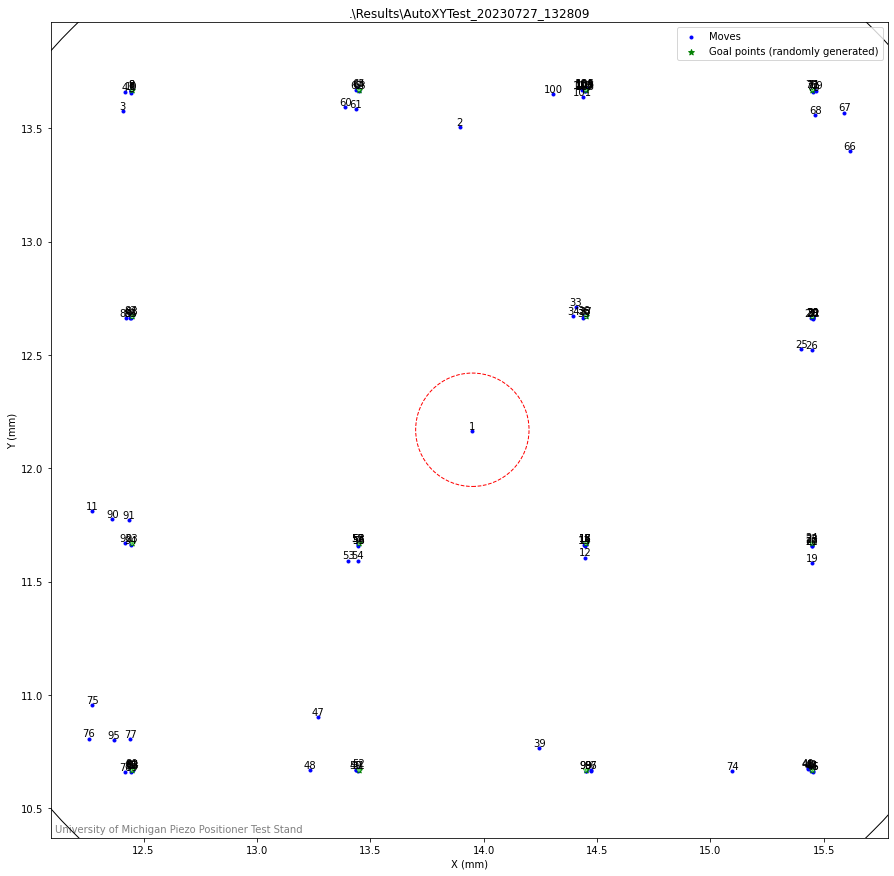

In [5]:
# Plot
steps = list(range(1,len(moves['X (mm)']) +1))
#print(steps)
figure = plt.figure(figsize=(15, 15))
ax = figure.add_subplot(111)
plt.scatter(moves['X (mm)'], moves['Y (mm)'],color='blue',label="Moves",marker='.')
plt.scatter(dest['X (mm)'], dest['Y (mm)'],c='green',label="Goal points (randomly generated)",marker = '*')

for (xi, yi, i) in zip(moves['X (mm)'], moves['Y (mm)'],steps):
    plt.text(xi, yi, i, va='bottom', ha='center')
    
circle_x = cc.circle['circle_x'] 
circle_y = cc.circle['circle_y']    
circle_r = cc.circle['circle_r']
circle1 = plt.Circle( (circle_x, circle_y ), circle_r , fill = False )
circle2 = plt.Circle( (circle_x, circle_y ), 0.25 , fill = False, color = 'r', linestyle = '--')
ax.add_artist( circle1 )
ax.add_artist( circle2 )

#print(list(range(1,len(destination['X (mm)']) +1)))

for i in range(len(dest['Y (mm)'])):
    circle = plt.Circle( (dest['X (mm)'][i] , dest['Y (mm)'][i]), 0.005 , fill = False, color = 'lightgreen', linestyle = '-')
    ax.add_artist( circle )
    

#plt.text(moves['X (mm)'][0],moves['Y (mm)'][0],'  START',size = 10)
#plt.plot(moves['X (mm)'],moves['Y (mm)'],color = 'black', linestyle = ':',label="Movements ('as the crow flies')" )

ab = AnchoredText("University of Michigan Piezo Positioner Test Stand", loc="lower left", frameon=False, borderpad=0, prop=dict(alpha=0.5), )
ab.set_zorder(0)
ax.add_artist(ab)

plt.title(folder)
plt.axis('equal')
#ax.set_xlim(12.5,13.5)
#ax.set_ylim(7.25,8.25)
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.legend(loc='upper right')
plt.savefig(folder + '\FullPlot')
plt.show()

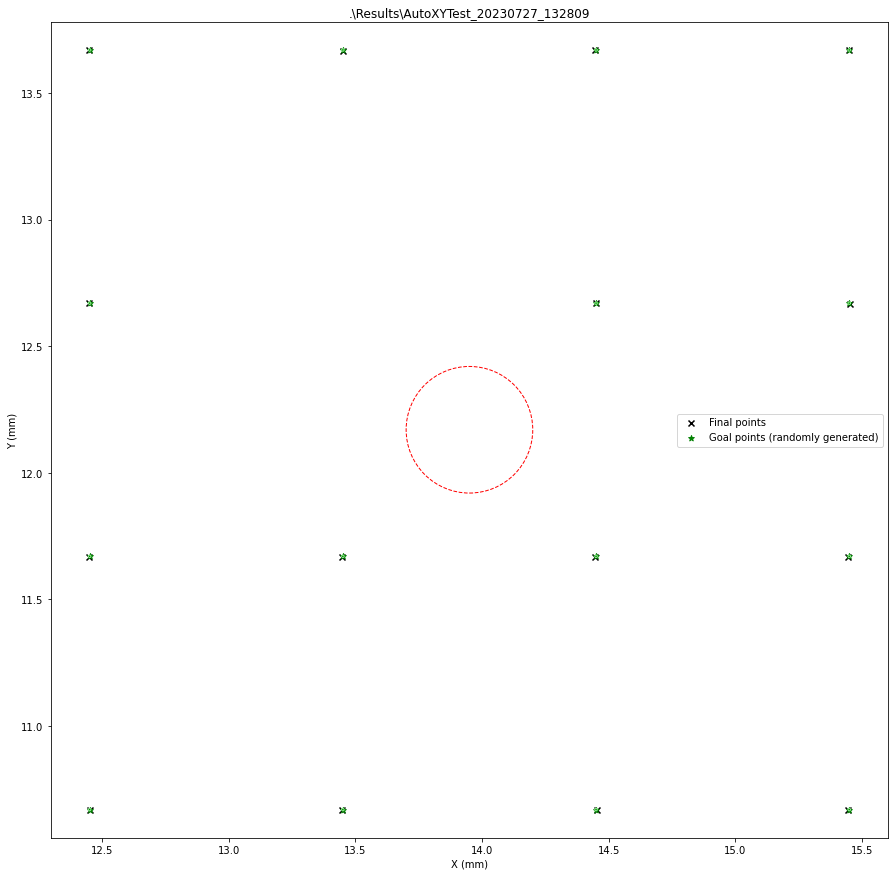

In [6]:
# Plot
steps = list(range(1,len(moves['X (mm)']) +1))
#print(steps)
figure = plt.figure(figsize=(15, 15))
ax = figure.add_subplot(111)
plt.scatter(finals['X (mm)'], finals['Y (mm)'],c='k',label="Final points",marker = 'x')
plt.scatter(dest['X (mm)'], dest['Y (mm)'],c='green',label="Goal points (randomly generated)",marker = '*')
#plt.scatter(moves['X (mm)'], moves['Y (mm)'],label="Moves",marker='o',c=steps,cmap ='gnuplot')

circle_x = cc.circle['circle_x'] 
circle_y = cc.circle['circle_y']    
circle_r = cc.circle['circle_r']
circle1 = plt.Circle( (circle_x, circle_y ), circle_r , fill = False )
circle2 = plt.Circle( (circle_x, circle_y ), 0.25 , fill = False, color = 'r', linestyle = '--')
ax.add_artist( circle1 )
ax.add_artist( circle2 )


for i in range(len(dest['Y (mm)'])):
    circle = plt.Circle( (dest['X (mm)'][i] , dest['Y (mm)'][i]), 0.005 , fill = False, color = 'lightgreen', linestyle = '-')
    ax.add_artist( circle )

plt.title(folder)
plt.axis('equal')
#ax.set_xlim(12,12.4)
#ax.set_ylim(9.4,9.8)
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.legend(loc='best')
plt.savefig(folder + '\CoordsOnly')
plt.show()

Max arrow length = 4.94 um


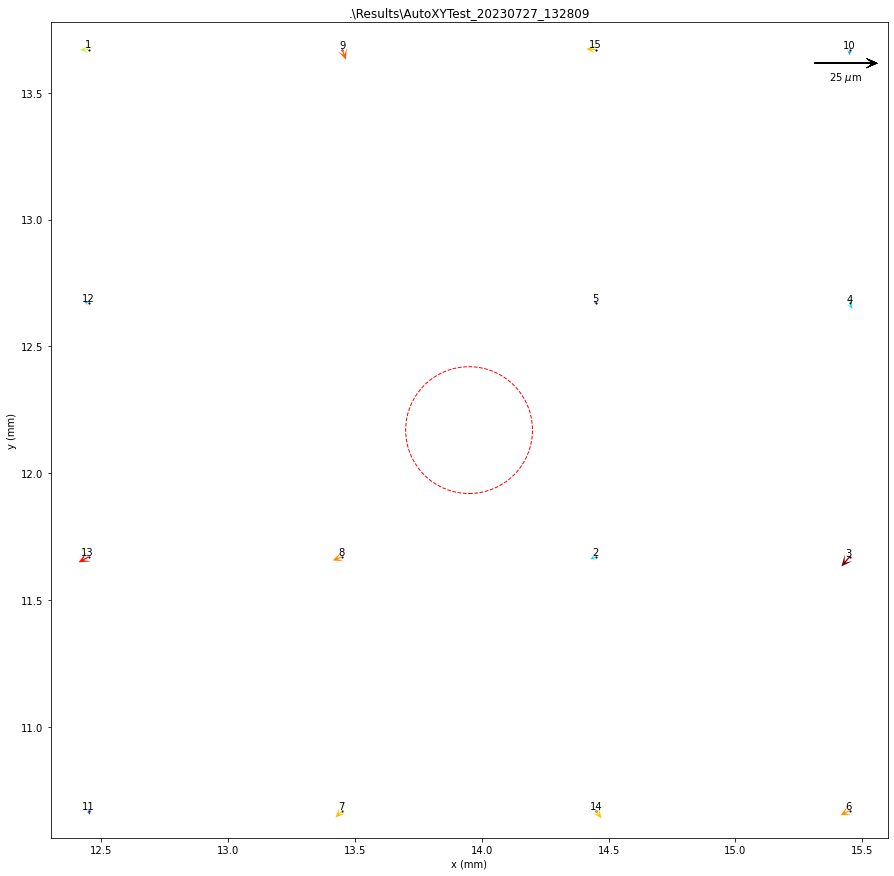

In [7]:
#### Creating plot
fig, ax = plt.subplots(figsize = (15, 15))
order = list(range(1,len(finals['X (mm)']) +1))

label = 'xy60'
xpos = finals['X (mm)']
ypos = finals['Y (mm)']
xt = dest['X (mm)']
yt = dest['Y (mm)']

circle_x = cc.circle['circle_x'] 
circle_y = cc.circle['circle_y']    
circle_r = cc.circle['circle_r']
circle1 = plt.Circle( (circle_x, circle_y ), circle_r , fill = False )
circle2 = plt.Circle( (circle_x, circle_y ), 0.25 , fill = False, color = 'r', linestyle = '--')
ax.add_artist( circle1 )
ax.add_artist( circle2 )

# Calculate residuals in microns
u = 1e3 * (xpos - xt)
v = 1e3 * (ypos - yt)
dr = np.hypot(u, v)
print(f'Max arrow length = {np.max(dr):.2f} um')

ref=25
ax.scatter(xt, yt, marker='.', c='k', s=5)
Q = ax.quiver(xt, yt, u, v, dr, angles='xy', scale=100, scale_units='xy',
              headwidth=8, headlength=9, width=0.001*1.5, color='k' ,cmap='jet')

for (xi, yi, i) in zip(finals['X (mm)'], finals['Y (mm)'],order):
    plt.text(xi, yi, i, va='bottom', ha='center')

ax.quiverkey(Q, X=0.95, Y=0.95, U=ref, label=f'{ref} $\mu$m', labelpos='S')
ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')
plt.axis('equal')
plt.title(folder)
plt.savefig(folder + '\Quiver')

In [8]:
minimum = float(errs.min(0))*1000
maximum = float(errs.max(0))*1000
median = float(errs.median(0))*1000
mean = float(errs.mean(0))*1000

print(f"Min: {minimum:.2f} um.")
print(f"Max: {maximum:.2f} um.")
print(f"Median: {median:.2f} um.")
print(f"Mean: {mean:.2f} um.")

Min: 1.14 um.
Max: 4.94 um.
Median: 3.78 um.
Mean: 3.24 um.


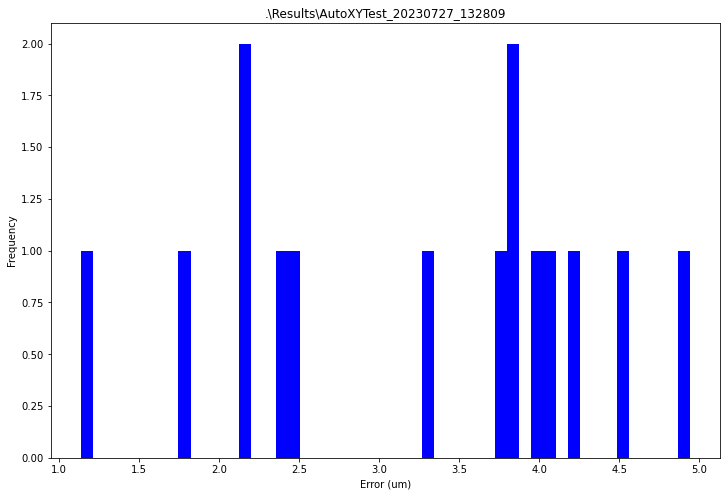

In [9]:
figure = plt.figure(figsize=(12, 8))
plt.hist(errs*1000,bins=50,histtype='stepfilled',color='b')
plt.xlabel('Error (um)')
plt.ylabel('Frequency')
plt.title(folder)
plt.savefig(folder + '\ErrorHist')

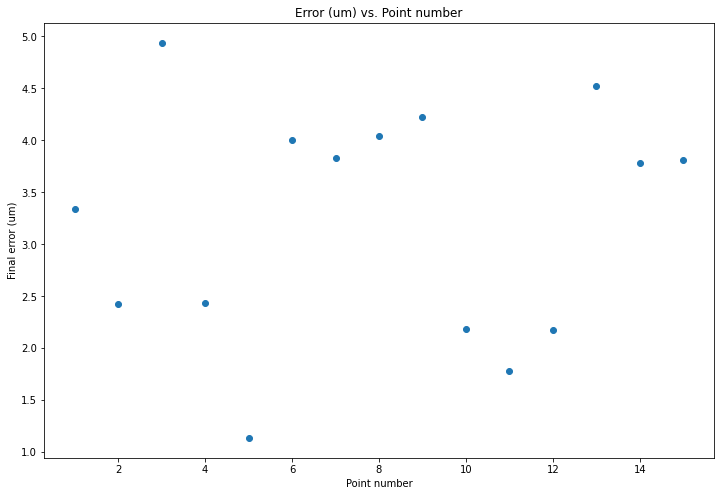

In [10]:
figure = plt.figure(figsize=(12, 8))
plt.scatter(order,(errs*1000))
plt.title('Error (um) vs. Point number')
plt.xlabel('Point number')
plt.ylabel('Final error (um)')
plt.savefig(folder + '\TotalErrorOverTime')

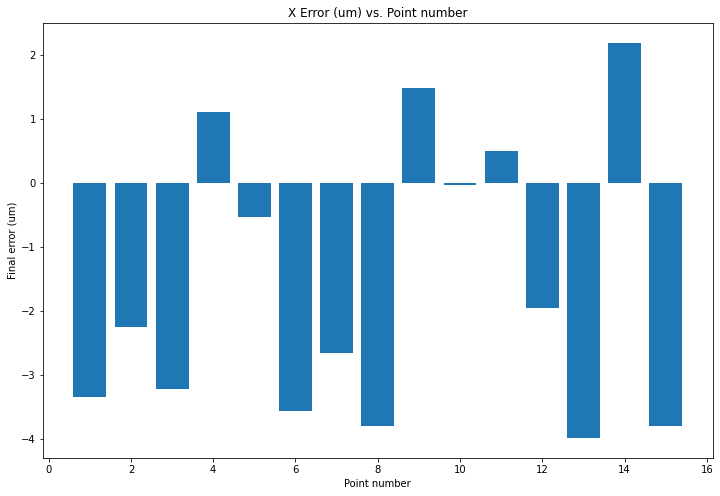

In [11]:
figure = plt.figure(figsize=(12, 8))
plt.bar(order,(finals['X (mm)']-dest['X (mm)'])*1000)
plt.title('X Error (um) vs. Point number')
plt.xlabel('Point number')
plt.ylabel('Final error (um)')
plt.savefig(folder + '\XErrorOverTime')

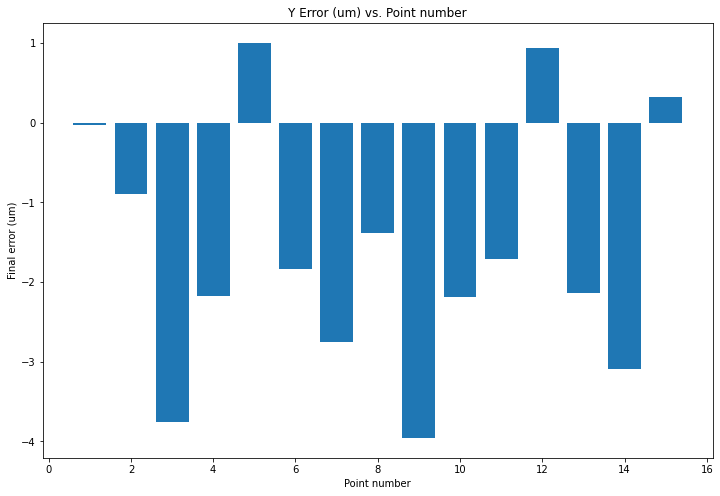

In [12]:
figure = plt.figure(figsize=(12, 8))
plt.bar(order,(finals['Y (mm)']-dest['Y (mm)'])*1000)
plt.title('Y Error (um) vs. Point number')
plt.xlabel('Point number')
plt.ylabel('Final error (um)')
plt.savefig(folder + '\YErrorOverTime')

ValueError: x and y must be the same size

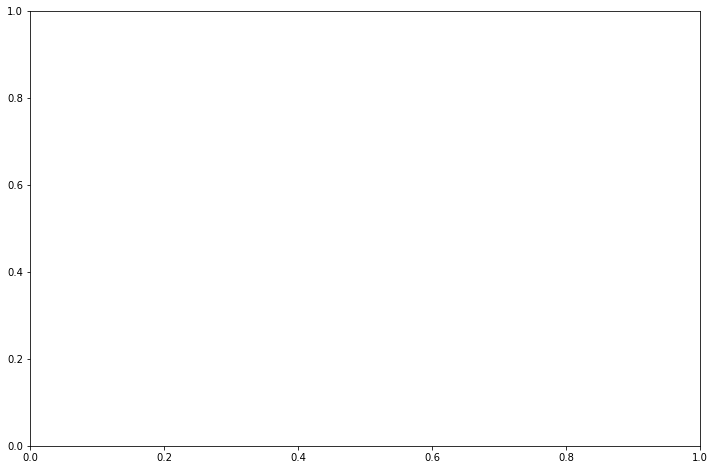

In [13]:
figure = plt.figure(figsize=(12, 8))
winorder = list(range(1,len(wins['X (mm)']) +1))
plt.scatter(winorder,attempts)
plt.title('Attempts vs. Win number')
plt.xlabel('Win number')
plt.ylabel('Attempts')
plt.savefig(folder + '\AttempsOverTime')

In [ ]:
print("Max attempts:",float(attempts.max(0)))
print("Min attempts:",float(attempts.min(0)))
print("Average attempts:",np.average(attempts))

In [ ]:
print(np.diff(dest['X (mm)']))

In [ ]:
figure = plt.figure(figsize=(12, 8))
plt.scatter(abs(np.diff(dest['X (mm)'])),(finals['X (mm)'][1:]-dest['X (mm)'][1:])*1000)
plt.title('X error vs. X travel')
plt.xlabel('X travel (mm)')
plt.ylabel('Final error (um)')
plt.savefig(folder + '\ErrorVsXTravel')

In [ ]:
figure = plt.figure(figsize=(12, 8))
plt.scatter(abs(np.diff(dest['Y (mm)'])),(finals['Y (mm)'][1:]-dest['Y (mm)'][1:])*1000)
plt.title('Y error vs. Y travel')
plt.xlabel('Y travel (mm)')
plt.ylabel('Final error (um)')
plt.savefig(folder + '\ErrorVsYTravel')

# 